# The flowers underneath my feet - a flowering plant survey in Biel/Bienne

In [1]:
# Final survey notebook for 2020-2021 plant surveys

# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math
from scipy import ndimage

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

# create column of mutually exclusive plant characteristics from dataset
def mutually_exclusive_plant_charac(data, new_col="allstats", old_col="inv"):
    a = data[data[old_col] != "X"].copy()
    a[new_col] = a[old_col]
    
    return a

charac = ["inv", "ns", "rch", "ni", "ongen"]

spd_allstats = pd.concat([mutually_exclusive_plant_charac(spd, old_col=x) for x in charac])

spd1 = spd_allstats.loc[spd_allstats.year == 1].copy()
spd2 = spd_allstats.loc[(spd_allstats["year"] == 2)].copy()

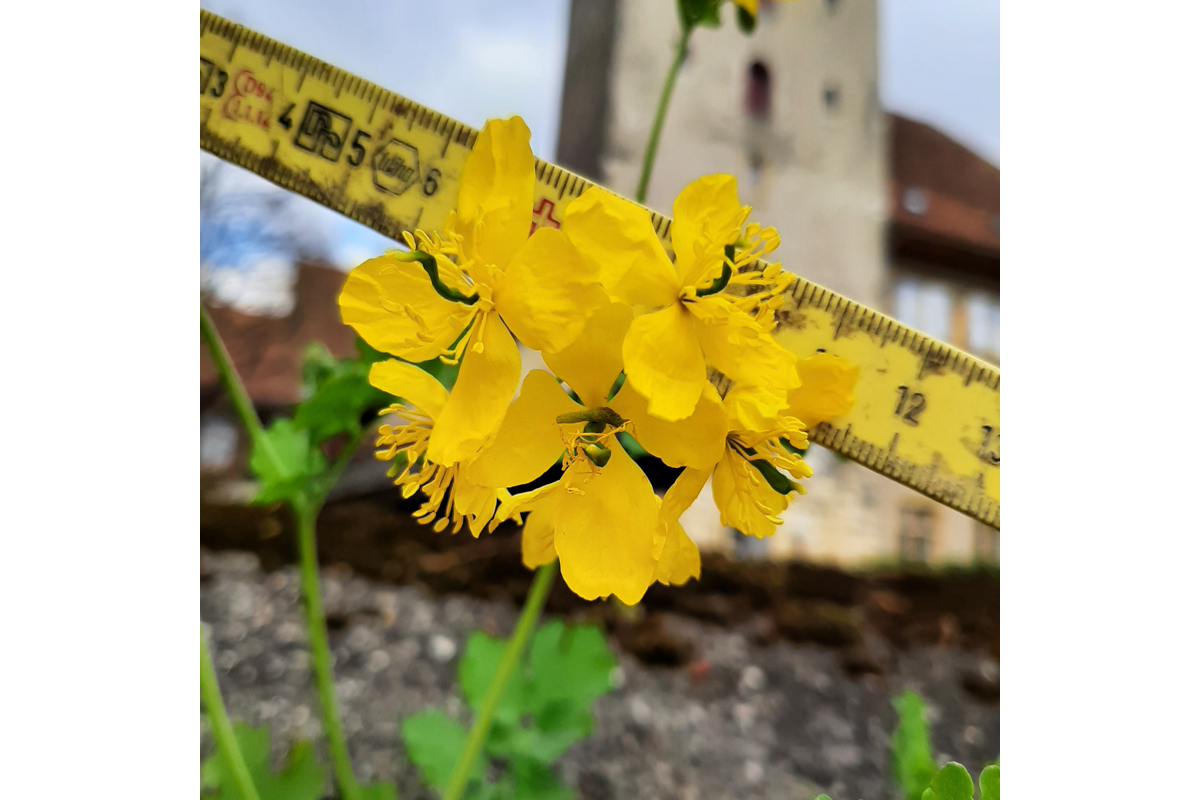

In [2]:
def display_image_ipython(file_location, thumb=(1200, 700), rotates=0):
    """Convenience method to use PIL and Ipython to display images.

    :param file_location: The location of the file relative location of the file
    :type file_location: string
    :param thumb: The size of the image
    :type thumb: tuple, integers
    :return: displays the image or a message that the image could not be displayed
    :rtype: displayed image
    """

    try:        
        if rotates == 0:
            r=PILImage.open(file_location).convert("RGBA")
            r = r.resize(thumb)
        else:
            
            r = PILImage.open(file_location).convert("RGBA")
            r = r.resize(thumb)            
            r = r.rotate(angle = rotates, expand=False)
            
        
        display(r)

    except:
        print(f"could not load image {file_location} ")

display_image_ipython("resources/images/20210403_123904.jpg", thumb=(1200,800), rotates=-90)

*__Figure 1 :__ Chelidonum majus near the Chateau de Nidau, in the commune of Nidau just across the Thiel Canal from Biel/Bienne.*

## Background

This report continues in the long tradition of amateur botanists recording the plant life in their region. The first survey period between June and September 2020 focused on the Suze river and its Madretschkanal variant in Biel/Bienne. The second set of surveys were conducted between February 2021 and September 2021 and included a wider geographical scope around the municipality of Biel/Bienne. The objective was to construct an initial dataset on the remnant flowering plant populations growing in different green spaces around the city of Biel/Bienne to understand the floral composition of the municipality.

## About the surveyor
Currently enrolled as a master student at the Oeschger Center for Climate Change Research at the Universität Bern, I obtained the first level *Bellis* certificate from the Swiss Botanical Society in July 2021. The survey and documentation has been prepared in collaboration with Hammerdirt, an association dedicated to helping researchers build analyses in the environmental sciences.

### Vascular Plants in Switzerland

There is a worldwide biodiversity crisis that has not spared the flora and faune of Switzerland. It has been known for some time that the flowering plants as a whole are not an exception; In 2010, the IUCN Redlist report on the conservation status of Swiss vascular plants concluded that:

> Overall, every single RedList documents a manifest and sustained loss of species diversity at national level. Most threatened species appear to be bound for further losses – with no likelihood of this trend being reversed in the short term. In other words, the requirement enshrined in the Swiss Constitution that animal and plant species be prevented from going extinct has not been fulfilled.

Ten years later, after identifying widespread local extinctions that irreversibly harm genetic diversity of plant populations and precede general extinctions, researchers concluded {cite}`Hicks_2020`: 

> Our study presents clear evidence that current efforts to conserve threatened plant species are insufficient to achieve national and international targets (Convention on Biological Diversity (CBD), 2011; Swiss Biodiversity Strategy 2012) for maintaining biodiversity. The current paradigm of protecting and restoring threatened habitats is failing to avert extinctions. Going forward, we need to develop a comprehensive landscape approach, involving the creation of ecological infrastructure and translocation and assisted migration of threatened species into suitable habitats.

In Switzerland the vascular plants that are most threatened are aquatic or semi-aquatic {cite}`Bornand_2016`. Widespread modification of waterways, the spread of invasive species, agricultural run-off, development of shorelines and regulation of water levels has led to the decline of suitable habitats and subsequently some 70% of species are evaluated as threatened to some extent in the 2016 Redlist. Species associated with traditional forms of agriculture and land management, namely species in low altitude prairies, ruderal areas, and cropland/vineyards, which have largely dissapeared in the past 100 years, range from 40% - 60% threatened (Ibid). The decline of these species follows directly from changing agricultural practices. The species of least concern are associated with alpine habitat, rockfalls, and other largely undisturbed habitat that have historically been relatively spared from encroachment (Ibid). All of this is unfolding against the backdrop of accelerating climate change that researchers expect will provoke a major shift in habitat distributions and be a medium-term stress factor for a significant number of Switzerland's vascular plants {cite}`Vittoz_2013`.

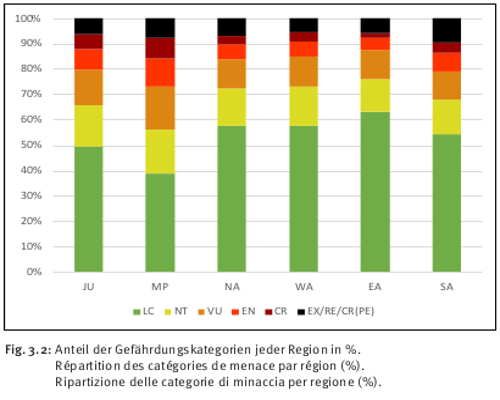

In [3]:
display_image_ipython("resources/images/redlist-species.png", thumb=(500,400))

*__Figure 2 :__ This figure taken from Infoflora's 2019 Regional Redlist shows the assessed threat level of the different plants in each of Switzerland's regions. We see that the middle plateau / central plateau (MP) has the highest number of plants rated higher than "LC", or least concern, followed by the Jura (JU)*

### Middle plateau
The heart of Switzerland's population and economic output, the Middle Plateau is also where localized extinctions are most prominent. Some 60% of the vascular plant species evaluated for the IUCN's Redlist in the Central Plateau are classified as potentially or actually regionally threatened, followed by the Jura region with 50% {cite}`Infoflora_2019`. Again, species associated with freshwater habitats are the group of most concern, with some 3/4 of species under potential threat. Around 60% of the alpine populations that survive throughout the plateau, are evaluated as under potential threat, as are just over half of lowland grassland species, and nearly half of forest species {cite}`Infoflora_2019`. Increased levels of output and consumption, as well as relatively intensive agricultural practices, are identified as the main drivers of risk for regional biodiversity. Not all of this is due directly to higher anthropogenic pressures: the central plateau hosts isolated, localized populations that are inherently more vulnerable to pressures on their populations (Ibid).

### Urban and suburban conservation

A judicious use of public spaces, such as road verges, railroad berms and parks, that balances their potential as habitats with the needs and requirements of the city's inhabitants can mitigate some anthropologic pressure. Allowing spaces to go un-mowed, sowing native wild-flower beds, and creating micro-habitats throughout urban and suburban areas can benefit both herbaceous and predatory insects {cite}`Sattler_2011`. In fact, (sub)urban green spaces and road verges can provide plants, insects, and birds with suitable conditions to pursue their life cycles and even become a "last refuge" for certain species (ibid).  While private gardens clearly provide refuge for native species, research also shows that private gardens are heavily biased towards non-native plants, potentially making public spaces even more important as a suitable refuge for remnant wild species. As such, improvement and maintenance of areas in and around urban centers could yield outsized results in terms of biodiversity preservation at this critical juncture for the future of ecosystem services. Research has shown that increasing the size of green patches and ensuring connectiviy with larger green spaces within urban areas can boost bidiversity within cities {cite}`VEGA2020`. Further, the most recent data of nationwide biodiversity provided by the Biodiversity Monitoring System shows a decline in urban vascular plant species diversity {cite}`FOEN_2020`.

There are a number of different strategies that municipalities can use to boost wildflower diversity with different input costs and outcomes. For example, three comparable strategies are (1) the sowing of annual wildflowers (2) the planting and maintenance of (native) perennials and (3) reducing mowing frequencies to allow for seed formation and deposition. A comparitive study of the three outcomes showed annual wildflower patches strongly dominated by native perennial patches and reduced mowing frequences, with remnant populations providing resources during the crucial early months of Spring than either perennial or annual wildflower patches. In fact, annual wildflower strips ploughed during the winter period can act as an ecological trap for overwintering arthropods who are killed during the process: one study found nearly 70% of beetles failed to emerge from hibernation in wildflower strips managed in this way{cite}`GANSER2019123`. Perennial wildflower strips on the other hand were found to provide signficant habitat for arthropods (Ibid). In short, management decisions can have wide ranging effects: one recent finding from zürich, which confirms previous research, is that sowing of commercial wildflower seed in two annual species signficantly impacted the gene pool of the species in the city {cite}`VEGA2020`.

## Survey locations
In the first year, sites were chosen almost exclusively on the urban Suze river and its Madretschkanal variant in Biel/Bienne. Along this stretch of the river there are many varied habitats, ranging from deep shade to full pavement to flower strips maintained for ecological and aesthetic purposes. Sites were chosen in a semi random way out of locations that are managed the municipality to a greater or less degree and reasonably accessible. Their is a bias towards locations around the Madretsch quarter and towards locations with visible flower plants. In 2021 the surveys included a wider geographic scope, but still focused on the Madretschkanal and the urban Suze river. The zones surveyed ranged from railroad berms to green areas in and around sidewalks and renaturalization sites. As such, the sites varied greatly in size and shape. 

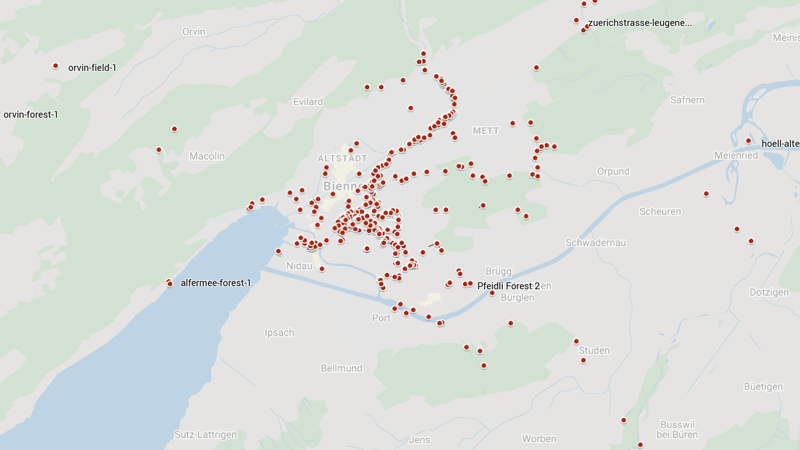

In [4]:
display_image_ipython("resources/images/mymaps.png", thumb=(800,450))

*__Figure 3 :__ Map of survey locations around Biel/Bienne in 2020 - 2021. Note that some surveys occured outside the scope of this map and the heavy focus on the Suze river and the Madretschkanal branch, as well as the Madretch quarter of Biel/Bienne in particular.*

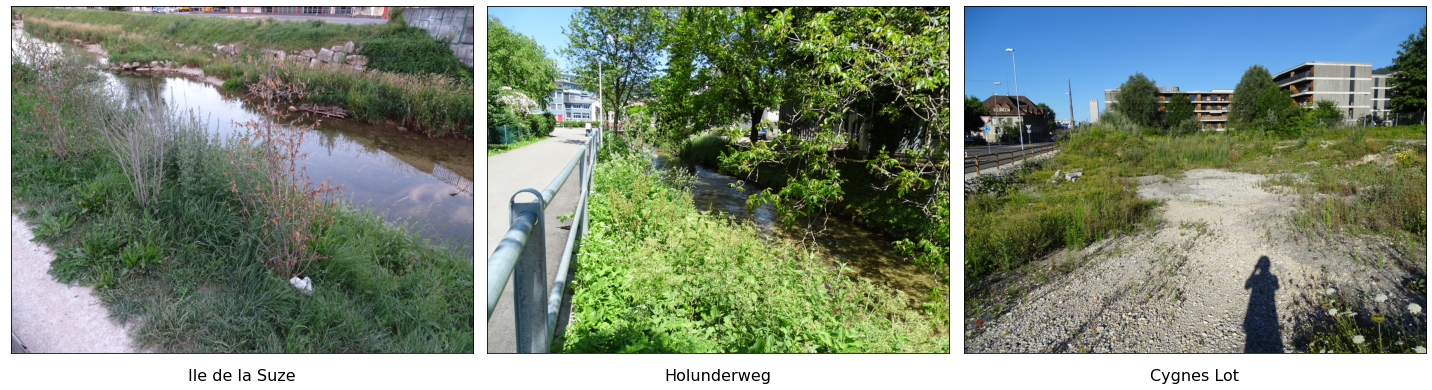

In [5]:
# generate images of survey sites

# read images
img_A = mpimg.imread('resources/images/DSC04657.JPG')
img_B = mpimg.imread('resources/images/suze-2.JPG')
img_C = mpimg.imread('resources/images/DSC02009.JPG')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))

for anax in ax:
    anax.set_xticks([])
    anax.set_yticks([])

ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

ax[0].set_xlabel("Ile de la Suze", fontsize=16, labelpad=15)
ax[1].set_xlabel("Holunderweg", fontsize=16, labelpad=15)
ax[2].set_xlabel("Cygnes Lot", fontsize=16, labelpad=15)
plt.tight_layout()

plt.show()

*__Figure 4 :__ Images of three survey sites along the urban Suze river and the Madretschkanal. There was a great diversity in survey site characteristics amenable to many varieties of plants.*

The size of the sites was not recorded, but a detailed description is available. In nearly all cases it is also possible to recover the boundary of the sites based on the geometry of the object as surveys were usually bounded by sidewalks, roads, or other barriers. Larger features, such as those in the photos above, were typically broken into smaller sites and surveyed individually to give some idea of the variation (or lack thereof) along a given feature. Sometimes the survey sites are small and isolated as in the features surveyed in Zukunftstrasse shown below on the right. While this data is not directly accessible in this analysis for the various survey sites, it can be reconstructed from the survey notes and the satellite imagery.

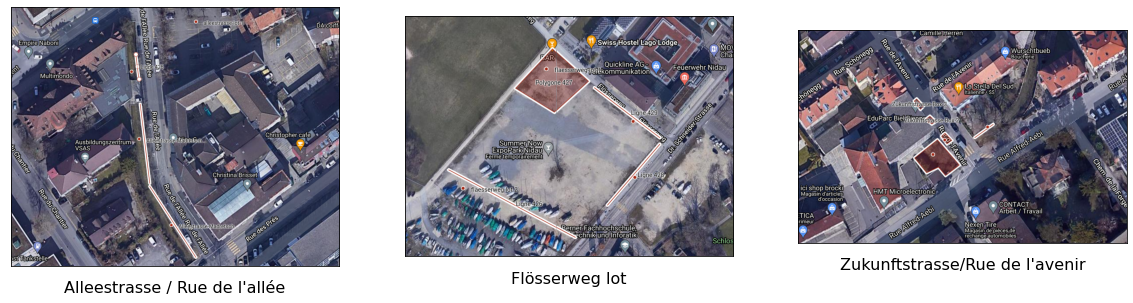

In [6]:
# plot the survey sites

# read images
img_A = mpimg.imread('resources/images/Selection_029.png')
img_B = mpimg.imread('resources/images/Selection_030.png')
img_C = mpimg.imread('resources/images/Selection_031.png')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))

for anax in ax:
    anax.set_xticks([])
    anax.set_yticks([])

ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)


ax[0].set_xlabel("Alleestrasse / Rue de l'allée", fontsize=16, labelpad=15)
ax[1].set_xlabel("Flösserweg lot", fontsize=16, labelpad=15)
ax[2].set_xlabel("Zukunftstrasse/Rue de l'avenir", fontsize=16, labelpad=15)

plt.tight_layout

plt.show()

*__Figure 5 :__ Three examples of the decomposition of city features into survey sites. __Left :__ The concrete driveway and the bend in the Madretschkanal make natural separations in the three survey sites. __Middle :__ Shows the survey sites at the Flösserweg lot. It was surveyed three different times in four different locations. __Right :__ Two different feature types were surveyed at this location near Zukunftstrasse: Three raised garden beds put in by the city to slow street traffic, and two isolated river bank sites.*

## Method

A site was inspected for the vascular plants in flower, and all the different species identified were recorded. Throughout the survey period, only plants in flower were identified in order to increase the reliability of observations. The exceptions were some trial tree identifications, shrub identifications (such as the genus Nitida, Taraxacum), and *Hedera helix*, which is imminently recognizable and is common throughout survey locations. Most of these non-flower identifications are to the genus level only. Note that Poaceae and Juncacea (grasses and sedges) were left off the survey entirely due to the difficulty in identification. For all species, the subspecies were not recorded. The below algorithm was repeated for all flowering plants on a survey site:
* If a plant was known it was checked for the recognizable characteristics and immediately recorded
* If a flower was not known it was looked up in a plant identification application (Flora Incognita and/or PlantNet) and subsequently checked against the latest Flora Helvetica guidebook. If an identification was confident, it was recorded.
* If an identification was not clear even after these consultations, it was recorded to the genus level if possible, or left off of the observations.

Nearly all plants could be identified following this algorithm, which became increasingly efficient as time went on. In June 2020, the number of plants that could be reliably identified by the surveyor was small, whereas by August 2020, the surveyor could reliably identify the common species that dominate the landscape. This meant that the 2020 - 2021 observations are not directly comparable as the surveyor was able to record a significantly higher number of species during the second year. In addition, as the number of species that were recognizable without the need to consult an algorithm or a guidebook increased, the surveys became increasingly quick. Some direct results of this data collection protocol are the following:
* The year on year results cannot be directly compared as the surveyor was able to identify more plants in the second year
* If a plant was visible but not flowering, it was very unlikely to be recorded on the survey
* There is no information about the relative densities of the plants within surveys

## Results

The following figures provide summary data from year one and year two. The general takeaway is that throughout the year there is a great diversity of plant species in bloom with a peak in July. There is high level of diversity on the species, genus and family level, which increased in the second year to 66 families, 275 different genus and 552 different species identified. Note that only the families of native species were included, meaning that a number of neophyte (non-native) families are not represented in the below tables. While some of these surveys were conducted outside of Biel, their part of the surveys is about 7%, meaning the overall patterns remain the same with their exclusion.

In [7]:
# functions for chart creation

def make_a_summary_table(ax, data,colLabels, a_color="black", font_size=12, s_et_bottom_row=True):
    
    """Formats matplotlib table object.

    Args:
    ax: object: matplotlib table object
    data: array: the 2d array used to generate the table object
    cols_to_use: array: the list of column names
    a_color: str: matplotlib named color, face and edgecolor of table cells
    font_size: int: the font size for the table cells
    s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
    The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = colors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i in np.arange(len(colLabels))]
    bottom_row = [(len(data), i) for i in np.arange(len(colLabels))]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
        
    for a_cell in top_row:
        ax[a_cell].visible_edges = "B"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor("black")
        ax[a_cell].PAD = .2
        ax[a_cell].set_linewidth = 1
        ax[a_cell].set_height(.5 / (len(data)))

    for a_cell in data_rows:
        ax[a_cell].set_height(.5 / (len(data)))
        ax[a_cell].visible_edges = "BT"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor(banded_color)
        ax[a_cell]._text.set_horizontalalignment("center")
        ax[a_cell].set_linewidth = .1

    if s_et_bottom_row is True:
        
        for a_cell in bottom_row:
            ax[a_cell].visible_edges = "B"
            ax[a_cell].set_edgecolor(line_color)
            ax[a_cell].set_linewidth = 1

    return ax



def a_simple_formatted_table(ax,data,colLabels=[], a_color="black", colWidths=[], bbox=[], **kwargs):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param colLabels: The labels for the data table columns
    :type colLabels: array
    :param a_color: The color of the cell borders
    :type a_color: str
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    a = ax.table(data,  colLabels=colLabels, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    t = make_a_summary_table(a, data, colLabels, a_color=a_color, font_size=12, s_et_bottom_row=False)
    return t


def a_stacked_bar_chart(ax, bars, xaxis=[], totals={}, palette={}, **kwargs):
    """Makes a stacked barchart given a matplotlib < ax > object
    and a dictionary of values for each "row" of the stack.
    
    :param ax: A matplotlib axes object
    :type ax: matplotlib.axes
    :param bars: Dictionary of values for each row
    :type bars: dict
    :param xaxis: The values that define the xaxis, can be
         date or categorical
    :type xaxis: array
    :param totals: A dictionary for a second non stacked bar chart.
    :type totals: dict
    :Return: A matplotlib axes object with a stacked barchart.    
    """
    # set the bottom of the stacked bar chart
    bottom = 0
    
    if totals:
        # this is a seperate independent stack
        # its value does not effect the value of <bottom>
        ax.bar(xaxis, totals["data"], bottom=bottom, label=totals["label"], zorder=0)
    else:
        pass
    
    for a_bar in bars:
        if palette:
            ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, color=palette[a_bar], zorder=2)
        else:
            ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, zorder=2)
        
        # add the value of data to bottom
        bottom += bars[a_bar]["data"]
    
    return ax

def a_single_column_table(ax,data, fs=12, colWidths=[.7, .3], bbox=[0,0,1,1], kwargs={}):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param fs: The font size for the cell data
    :type fs: float, int
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    
    
    a = ax.table(data, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    a.auto_set_font_size(False)
    a.set_fontsize(fs)

    return a

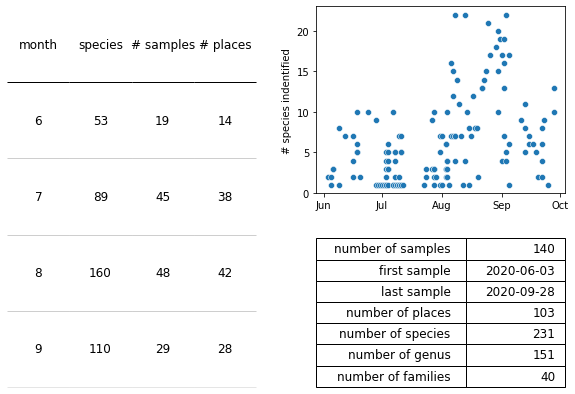

In [8]:
# axone monthly summary values
t_one = spd1.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})
species1 = spd1.species.nunique()
speciesint = spd1["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_one.values
colLabels = [*t_one.columns[:-2], "# samples", "# places"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd1.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd1.loc_date.nunique(),
    "first sample": spd1["date"].min().date(),
    "last sample":spd1["date"].max().date(),
    "number of places":spd1.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd1.genus.nunique(),
    "number of families":spd1.fam.nunique(),
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Figure 6__: Summary statistics for the first year of surveys. __Left :__ The number of unique species, unique samples, and unique sites surveyed per month in year 1. __Top right__: The number of species identified per survey per month in year 1. __Bottom right__: Summary statistics of year 1.*

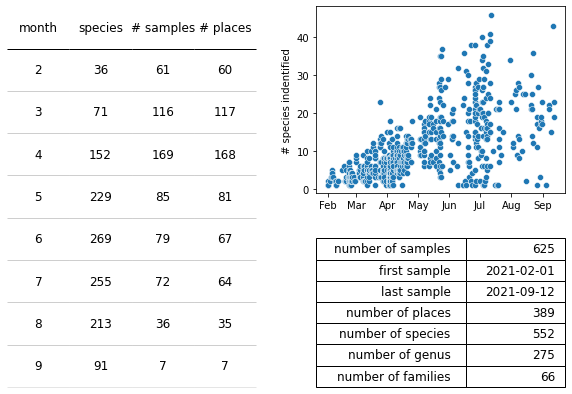

In [9]:
# axone monthly summary values
t_one = spd2.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})
species1 = spd2.species.nunique()
speciesint = spd2["species"].str.contains("-")
species2 = speciesint.nunique()
species_corrected = species1-species2

data = t_one.values
colLabels = [*t_one.columns[:-2], "# samples", "# places"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d1 = spd2.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd2.loc_date.nunique(),
    "first sample": spd2["date"].min().date(),
    "last sample":spd2["date"].max().date(),
    "number of places":spd2.locname.nunique(),
    "number of species":species_corrected,
    "number of genus":spd2.genus.nunique(),
    "number of families":spd2.fam.nunique(),
}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d1, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

*__Figure 7 :__ Same chart as the previous but for year 2. Notice the survey period began in February rather than June and the significantly increased number of observations across all metrics.*

### Categorizing the species

This analysis follows the classifications of Infoflora. The first major distinction is between native and non-native plants: all species that arrived after 1500 (the discovery of America) are considered neophytes and their distribution is less monitored than that of native species. Since native species are evaluated under the IUCN Redlist, it was assumed that any species on the Redlist is a native species. Aside from the quite small category of "ns" (5 observations, or .08% of all species identified), which includes culturally valuable neophytes, all species identified fall into either (1) the native species with their conservation status characterized by an IUCN Redlist attribute or (2) neophytes characterized by their potential (or lack thereof) to become invasive. Throughout the survey period most species identified were native and classified as "Least Concern" according to the latest IUCN Redlist classification. This is in line with what might be expected: the survey would likely identify populations of hardy, common plants resistant to anthropogenic pressures. As can be seen in the charts below, the general proportion of the categories remains the same between the different years and across months, with some variation as will be seen in the following sections.

In [10]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="allstats", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
spdas1 = spd_allstats.loc[spd_allstats["year"] == 1].copy()
spdas2 = spd_allstats.loc[spd_allstats["year"] == 2].copy()
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["allstats"]
not_these = ["X","-"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}
    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()

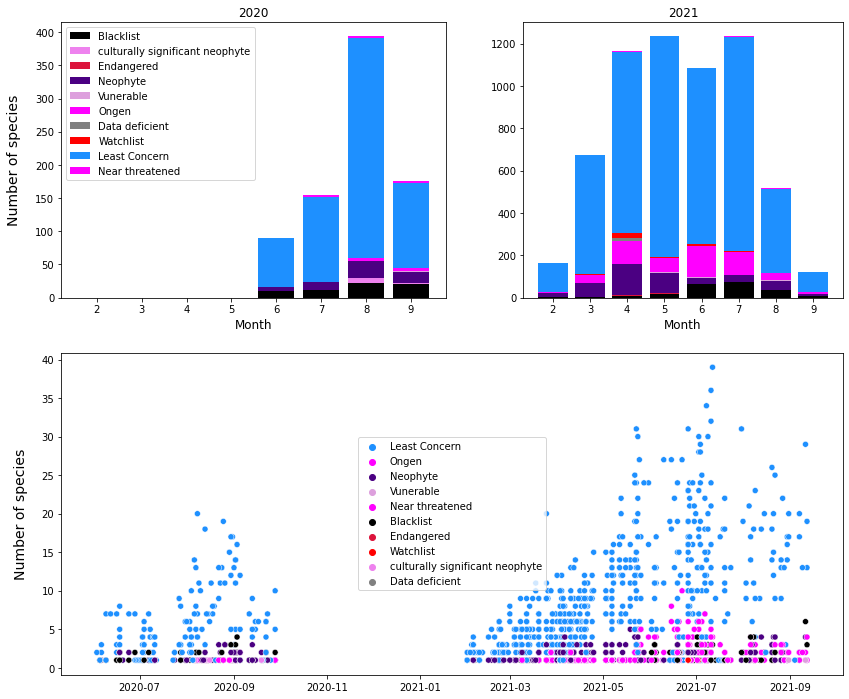

In [11]:
tick_spacing = 1

full_name = {
    "LC":"Least Concern",
    "EN":"Endangered",
    "NT":"Near threatened",
    "VU": "Vunerable",
    "NE":"Near endangered",
    "DD":"Data deficient",
    "WL":"Watchlist",
    "BL":"Blacklist",
    "ongen":"Ongen",
    "ns":"culturally significant neophyte",
    "ni":"Neophyte"
}

fig = plt.figure(figsize=(14,12))

gs = GridSpec(14,12)

axone = fig.add_subplot(gs[0:6, 0:6])
axtwo = fig.add_subplot(gs[0:6, 7:])
axthree = fig.add_subplot(gs[7:, :])

a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"

axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")
h,l = axone.get_legend_handles_labels()
nl = [full_name[x] for x in l]
axone.legend(h,nl)
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=all_stat, x="date", y="data", hue="allstats", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")

h,l = axthree.get_legend_handles_labels()
nl = [full_name[x] for x in l]
axthree.legend(h,nl, loc='center')

plt.show()   

*__Figure 8 :__ Categorization of the species identified plotted by month. __Top left :__ The number of unique species broken down per month and per classification category for 2020 surveys, __Top right :__ The number of unique species broken down per month and per classification survey for the 2021 surveys. __Bottom :__ The number of unique species identified per survey plotted monthly.*

### Neophytes (but not invasive!)

The vast majority of neophytes have little to no chance of establishing spontaneous populations in the wild or in urban spaces. A small number have succesffuly established populations in Switzerland over the past 500 years. One example of a common non-invasive neophyte (although it can become invasive locally), is the annual *Conyza canadensis* (*Erigeron canadensis*) from North America that thrives in disturbed areas around the city. It was identified in 12 locations in August and September 2021, however these numbers underplay the relative amount of the plant in a given location as it spreads quickly and can dominate a given area during the late summer. Despite this dominance, the plant generally cedes its place to normal succession processes as time passes and thus is not considered invasive. Another two common examples of neophytes that have succesfully naturalized without becoming invasive are *Onobrychis viciifolia*, common in fields and along road verges in late spring and early summer, and *Eupatorium cannabinum*, common along road verges and river banks. Both of these latter plants are available as "wild type" and are available in seed mixes for renaturalization and wildflower area creation. Indeed, a local plantling provider collects wild *Eupatorium cannabinum* for use in its plant production.

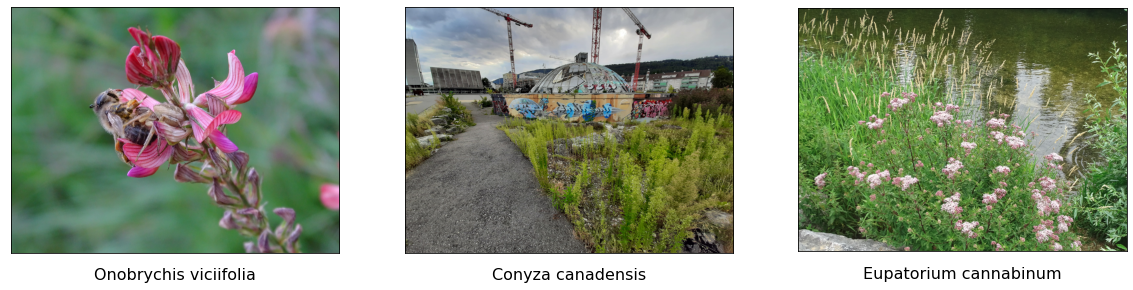

In [12]:
# generate images of non native, non invasive species
# read images
img_A = mpimg.imread('resources/images/intro-1.jpg')
img_B = mpimg.imread('resources/images/20210822_192453.jpg')
img_C = mpimg.imread('resources/images/Selection_028.png')

# display the images
fig, ax = plt.subplots(1,3, figsize = (20,12))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

# format axes to include labels and remove unnecessary formatting
for anax in ax:
    anax.set_xticks([])
    anax.set_yticks([])
    
ax[0].set_xlabel("Onobrychis viciifolia", fontsize=16, labelpad=15)
ax[1].set_xlabel("Conyza canadensis", fontsize=16, labelpad=15)
ax[2].set_xlabel("Eupatorium cannabinum", fontsize=16, labelpad=15)

plt.show()

*__Figure 9 :__ Three common non invasive neophytes that grow in different environments around Biel/Bienne. __Left to right :__ O. viciifolia is commonly found in blooms in fields, road and railroad berms in late spring; C. canadensis is an annual common in lots and highly disturbed areas; E. cannabinum thrives along river banks and in more humid areas and can bloom throught the late spring and summer.*

### Invasive species

A small number neophytes are considered invasive. They must be able to reproduce in the wild and pose a threat to humans and local ecosystems in order to reach this status. Usually for invasive plants this is through displacement of plant populations - the invasive species takes over a given area and native species have difficulty pushing it out. Info Flora maintains a list of the current watch list and black list species, a number of which were identified over the course of the survey. Some of them were purposefully planted, such as the rows of *Mahonia aquifolium* throughout Biel/Bienne's Madretsch quarter. Others have moved in of their own accord such as *Solidago canadensis* and *Erigeron Annuus*.

Invasive species in this study are defined as those species classified as either being on the *Watch List* (WL) or the *Black List* (BL) from the 2014 list compiled by Infoflora and the FOEN. Many more instaces of BL species were recorded than WL species throughout the course of the survey period, as can be seen in the below chart and tables. The most important take away is that invasive species are driven by a few key species, namely *Erigeron annuus* (BL), *Solidago canadensis* (BL), *Senecio inaequidens* (BL), *Buddleja davidii* (BL) and *Mahonia Aquifolium* (WL), with *E. annuus* twice as common as its nearest "competitor", *S. canadensis.* The most common WL species was *M. aquifolium* and is both very distinctive and had been widely planted by the municipality in preceeding decades.

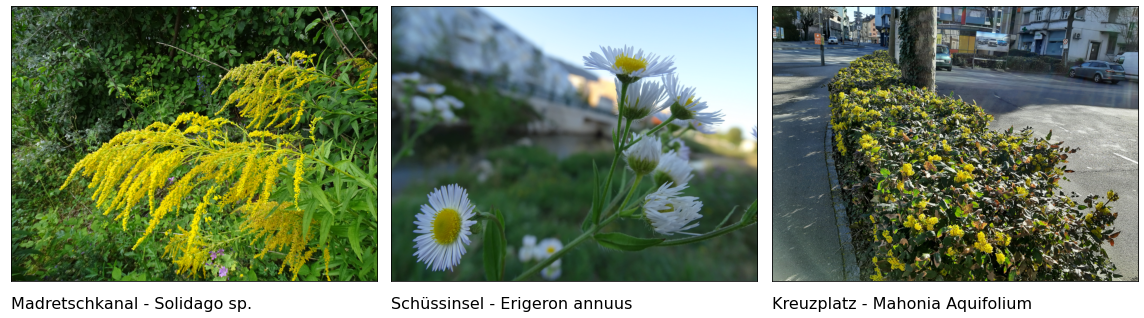

In [13]:
# Images for invasives

# read images
img_A = mpimg.imread('resources/images/DSC02758.JPG')
img_B = mpimg.imread('resources/images/iledelasuze2.JPG')
img_C = mpimg.imread('resources/images/20210404_093051.jpg')
img_C = ndimage.rotate(img_C,180)

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

# format axes to include label and remove unnecessary formatting
for anax in ax:
    anax.set_xticks([])
    anax.set_yticks([])

ax[0].set_xlabel("Madretschkanal - Solidago sp.", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Schüssinsel - Erigeron annuus", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Kreuzplatz - Mahonia Aquifolium", fontsize=16, loc='left', labelpad=15)
plt.tight_layout()
plt.show()

*__Figure 10 :__ Three common species of invasive plants found throughout the city. While all three of them spring up sontaneously, M. aquifolium was planted purposefully throughout the city and dominates some areas in Madretsch, such as Kreuzplatz.*

One interesting absence across all survey locations was *Reynoutra japonica*, a member of the Blacklist (BL). An aggressive invader of riverbanks and increasingly common throughout waterways in Switzerland, only one stand was identified near the Mettmoos park in Längholz. The following tables and charts summarize the BL and watchlist (WL) species identified over the course of the surveys. Note that Watchlist dynamics is driven by M. Aquifolium and BL dynamics are driven by a few species, but especially *E. Annuus*, followed by *Solidago canadensis* and *Senecio inaequidens.*

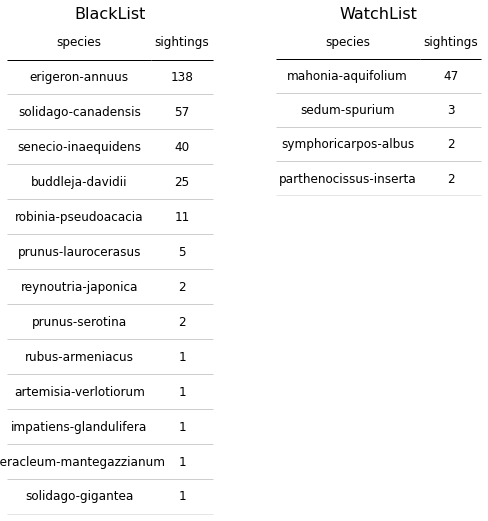

In [14]:
# Format these two tables
a = spd.loc[spd.inv == "BL", "species"].value_counts()
b = spd.loc[spd.inv == "WL", "species"].value_counts()

# tables
black_list = [[a.index[x],a.values[x]] for x in np.arange(len(a))]
white_list = [[b.index[x], b.values[x]] for x in np.arange(len(b))]

fig = plt.figure(figsize=(8.5,9))

gs = GridSpec(14,9)

axone=fig.add_subplot(gs[0:, :4])
axtwo=fig.add_subplot(gs[0:5,5:])
atable = a_simple_formatted_table(axone, black_list, colLabels=["species", "sightings"], colWidths=[.7,.3], bbox=[0,0,1,1])
axone.axis("off")
axone.set_title("BlackList", fontsize=16)

atable2 = a_simple_formatted_table(axtwo, white_list, colLabels=["species", "sightings"], colWidths=[.7,.3], bbox=[0,0,1,1])
axtwo.axis("off")
axtwo.set_title("WatchList", fontsize=16)
plt.show()

*__Figure 11:__ The above tables of the Black List and Watch List species demonstrate that the overall abundance of invasive species in the survey locations was driven by a few key species.*

In most cases either no invasives or only one invasive species was found in each survey. This is constant across months and across years. Since only a handful of invasives are driving these numbres, it is clear to that the higher numbers of invasive species identified in June, July, August and September corresponds to the flowering season of *E. Annuus*, *S. canadensis* and *S. inaequidens*

In [15]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="allstats", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
spdas1 = spd_allstats.loc[spd_allstats["year"] == 1].copy()
spdas2 = spd_allstats.loc[spd_allstats["year"] == 2].copy()
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["allstats"]
not_these = ["X","-"]

period = "month"
column = "allstats"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
    "WL":"red",
    "BL":"black",
    "ongen":"fuchsia",
    "ns":"violet",
    "ni":"indigo"
}    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_as_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_as_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_as_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_as_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)

# rmp status per survey
all_stat = pd.DataFrame(spd_allstats[~spd_allstats[column].isin(not_these)].groupby(["loc_date","date"]).allstats.value_counts()).rename(columns={column:"data"}).reset_index()

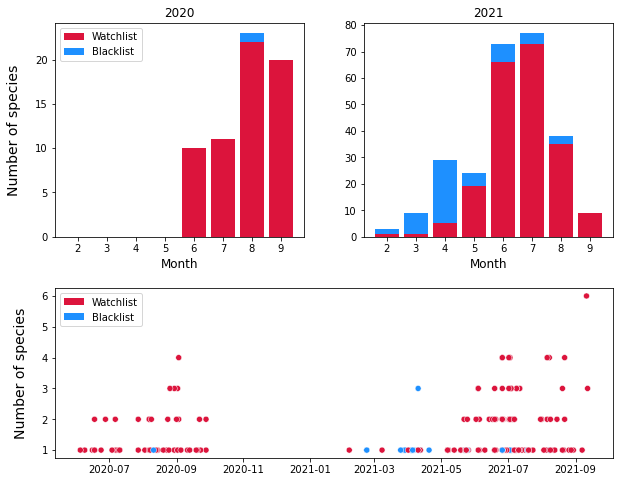

In [16]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="rch", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["inv"]
not_these = ["X","-"]

period = "month"
column = "inv"

biogeo = "mp"

a_palette = {
    "WL":"dodgerblue",
    "BL":"crimson",
}    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

inv_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

inv_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=inv_ytwo_bars)

# rmp status per survey
inv_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).inv.value_counts()).rename(columns={column:"data"}).reset_index()

tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

a_stacked_bar_chart(axone, inv_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, inv_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"

axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")

h,l = axone.get_legend_handles_labels()

axone.legend(h, ["Watchlist", "Blacklist"])

axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=inv_stat, x="date", y="data", hue="inv", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")
axthree.legend(h, ["Watchlist", "Blacklist"])

plt.show()   

__Figure 11 :__ The number of invasives identified over the course of the survey. __Top :__ The number of invasives identified per month in 2020 and 2021: __Bottom :__ The number of invasive species identified per survey over the course of two years.

### Redlist and priority list species on the middle plateau

The IUCN Redlist is an internationally comparable ranking of the conservation status of individual species and biotopes. Infoflora worked with the IUCN to create a national redlist for Switzerland, last updated in 2016. This analysis was complemented in 2019 with the publishing of a regional Redlist report. This provided a IUCN redlist rating for each native species in each of Switzerland's main biogeographical regions. In the previous analysis the redlist categories were based on the national rating as about 600 observations (out of 7600) occured outside of the Central Plateau region. This section uses only observations made within the middle plateau region and categorizes them according to this regional redlist analysis. This is still the vast majority of survey locations and species identified and as will be seen does not change the overall decomposition.

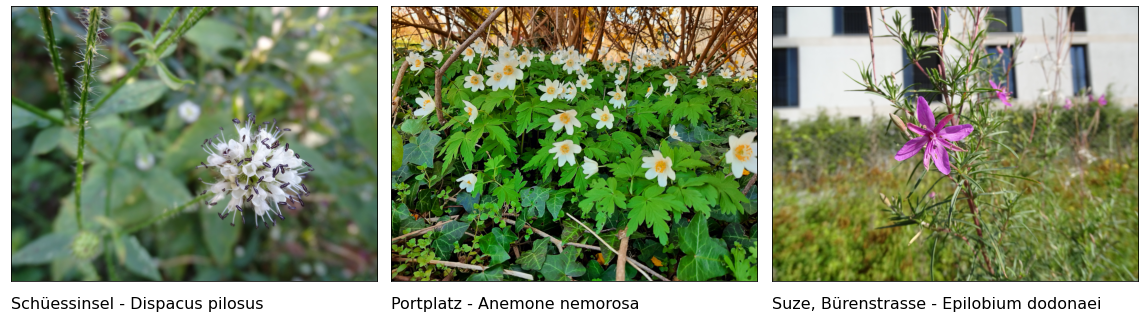

In [17]:
# Images for invasives

# read images
img_A = mpimg.imread('resources/images/dipsacus-pilosela.JPG')
img_B = mpimg.imread('resources/images/20210404_154240.jpg')
img_C = mpimg.imread('resources/images/epilobium-dodonaei.JPG')
img_B = ndimage.rotate(img_B,180)

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

# format axes to include label and remove unnecessary formatting
for anax in ax:
    anax.set_xticks([])
    anax.set_yticks([])

ax[0].set_xlabel("Schüessinsel - Dispacus pilosus", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Portplatz - Anemone nemorosa", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Suze, Bürenstrasse - Epilobium dodonaei", fontsize=16, loc='left', labelpad=15)
plt.tight_layout()
plt.show()

*__Figure 12 :__ Some examples of native species found throughout Biel/Bienne. From left to right: D. Pilosella, Anemone nemorosa, Epilobium dodonaei*

As noted in the introduction, the regional redlist for the middle plateau ranks many species on a higher risk classification than the national redlist as many populations are under more threat on the middle plateau than in other biogeographic regions. While species in each category were identified, the vast majority of native species were of least concern. Compared to using the national redlist ranking, the overall results do not change, with only a few species moving from Least Concern to Near Threatened.

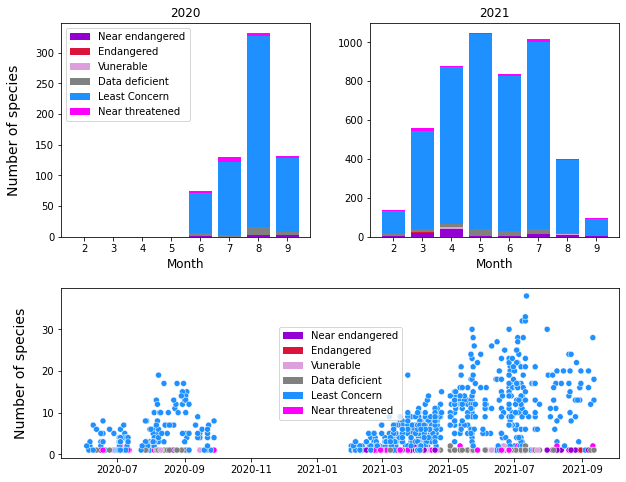

In [18]:
def periodic_value_counts(data, column, period="month", exclude=[]):
    a = data[~data[column].isin(exclude)]
    b = pd.DataFrame(a.groupby(period)[column].value_counts()).rename(columns={column:"data"})
    
    return b.reset_index()

def assign_axis_values(data, period="month", column="rch", value="NT", these_dates=[], bars={}):
    
    a_dates = data[data[column]== value][period].unique()
    add_dates = [x for x in these_dates if x not in a_dates]
    add_these = [{period:x, column:aval, "data":0} for x in add_dates]
    data = data.append(add_these)
    bars.update({aval:{"data":data[data[column] == aval].sort_values(by="month")["data"].values}})
    
    return data, bars

# count the number of occurences for each category at each survey
these_years = [spdas1, spdas2]
these_dates = [x["month"].sort_values().unique() for x in these_years]
set_dates = list(set(these_dates[0]) | set(these_dates[1]))

these_lists = ["rch","ni", "inv", "ongen"]
not_these = ["X","-"]

period = "month"
column = "rmp"

biogeo = "mp"

a_palette = {
    "LC":"dodgerblue",
    "EN":"crimson",
    "NT":"magenta",
    "VU": "plum",
    "NE":"darkviolet",
    "DD":"grey",
}    

# make bar for bar plots
# the unique values in the column of interest
e = list(set(spdas1[column].unique()) | set(spdas2[column].unique()))
e=[x for x in e if x not in not_these]

# year one
newDf = spdas1[(spdas1.biogeo == biogeo)&(~spdas1[column].isin(not_these))]
data_rch_yone = periodic_value_counts(newDf, column, exclude=not_these)

red_list_yone_bars = {}
for aval in e:
    d_yone, _ = assign_axis_values(data_rch_yone, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_yone_bars)

# year two
newDf2 = spdas2[(spdas2.biogeo == biogeo)&(~spdas2[column].isin(not_these))]
data_rch_ytwo = periodic_value_counts(newDf2, column, exclude=not_these)

red_list_ytwo_bars = {}
for aval in e:
    d_ytwo,_ = assign_axis_values(data_rch_ytwo, period=period, column=column, value=aval, these_dates=set_dates, bars=red_list_ytwo_bars)
    
# rmp status per survey
rmp_stat = pd.DataFrame(spd[~spd[column].isin(not_these)].groupby(["loc_date","date"]).rmp.value_counts()).rename(columns={column:"data"}).reset_index()

tick_spacing = 1

fig = plt.figure(figsize=(10,8))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[0:5, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, :])

a_stacked_bar_chart(axone, red_list_yone_bars, xaxis=set_dates, palette=a_palette)
a_stacked_bar_chart(axtwo, red_list_ytwo_bars, xaxis=set_dates, palette=a_palette)

xlabel = "Month"
ylabel = "Number of species"

axone.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axone.set_ylabel(ylabel, fontsize=14, labelpad=14)
axone.set_xlabel(xlabel, fontsize=12)
axone.set_title("2020")

h,l = axone.get_legend_handles_labels()

ls = [full_name[x] for x in l]
axone.legend(h,ls)
axtwo.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axtwo.set_xlabel(xlabel, fontsize=12)
axtwo.set_title("2021")

sns.scatterplot(data=rmp_stat, x="date", y="data", hue="rmp", palette=a_palette, ax=axthree)
axthree.set_ylabel(ylabel, fontsize=14, labelpad=14)
axthree.set_xlabel("")
axthree.legend(h,ls, loc="center")

plt.show()   

*__Figure 13 :__ The number of native species identified over the course of the surveys and their classification by Redlist status. __Top :__ The number of species in each Redlist category identified per month per year. __Bottom :__  The number of native species in each category identified per survey over the whole time period.*

## Conclusions and Discussion

According to Infoflora, 1207 different vascular plant species have been identified in the 100 square kilometers roughly centered on Biel/Bienne. Of these species, some 750 were not identified on the plant surveys and about 100 species were identified in the surveys but not included in Infoflora's list of observations. While a great part of this mismatch is due to the surveyor not identifying most trees and grasses, it also indicates a significant floral diversity in the region that was not identified in the surveys. It also indicates that Infoflora may be underestimating the diversity of plant species in urban spaces, even if this diversity comes from commercial seeds and non-native plants.

Despite all of these limitations, the fine scale of these surveys allows for a neighborhood by neighborhood and block by block analysis of plant resources in the city and adds to the body of evidence that suggests urban spaces can provide spaces for biodiversity if properly managed. A similar, albeit more detailed, approach is followed in Vega 2020 to survey the plant populations of Zürich and provide evidence for greenspace design and management. Based on the data already keyed in to the dataset, there are useful analysis that can be done to compare different city features and renaturalization sites in and around Biel/Bienne. In addition, there are clear and direct extensions thanks to rich sources of data available from municipal authorities that could allow explanatory causes to be determined and differentiated site treatments to be evaluated. Finally, providing an area component to the surveys will allow use of tools such as the Species Richness Model that ties plant diversity to greenspace size in urban areas.

Some general conclusions about the herbaceous flowering plants of Biel/Bienne that can be drawn from the above summaries are the following:
* While invasive speces are widespread, they do not dominate the landscape and are characterized by a few key species
* Neophytes form a critical part of the vegetation of the city
* Only a few threatened or near threatened species that are able to survive in the Biel/Bienne urban matrix.
* Public spaces contain significantly more native vegetation (around 80%) than private gardens (30%)

Plant surveys need to be done year on year as weather and other factors can significantly affect the population distributions of vascular plant species. The first survey year, 2020, coincided with the warmest year on record in Switzerland, tied with 2018, with a scarcity of rainfall. Meanwhile, 2021 saw the wettest and coldest spring and summer weather for many local records. It is thus to be expected that these extreme variations would result in different plant species being identified across Biel/Bienne as a whole and even in certain survey locations. One anecdote of this is a regionally Near Threatened species, *Dipsacus pilosus*, which was identified near the Ile de la Suze on the banks of the Suze river in 2020, however in 2021 the site was submerged for much of the survey period due to the extra rainfall and there was no sign of its presence. While this sort of data can begin to be teased out by comparing the roughly 50 sites that overlap between 2020 and 21, the overall year on year analysis should wait until the 2022 data can be gathered.

In short, there are a number of interesting extensions to this analysis, some of which are possible with the available data and some of which will require integration with other datasets or collection of additional data. Plant surveys will begin anew in mid February 2022. Due to the surveyor's experience, it is expected to match or exceed the observations made in 2021, which will provide a strong year on year data set of species make-up across seasons and across the city. There are a few modifications in the protocol which will facilite data collection and provide information on species density within locations.

## Contact me
Qustions ? Comments ? Feedback most welcome at thor.erismann @ gmail.com